In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('ANN_Quiz_Data_Breast_Cancer.csv')

In [3]:
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [5]:
dups = data.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
data[dups]

Number of duplicate rows = 0


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target


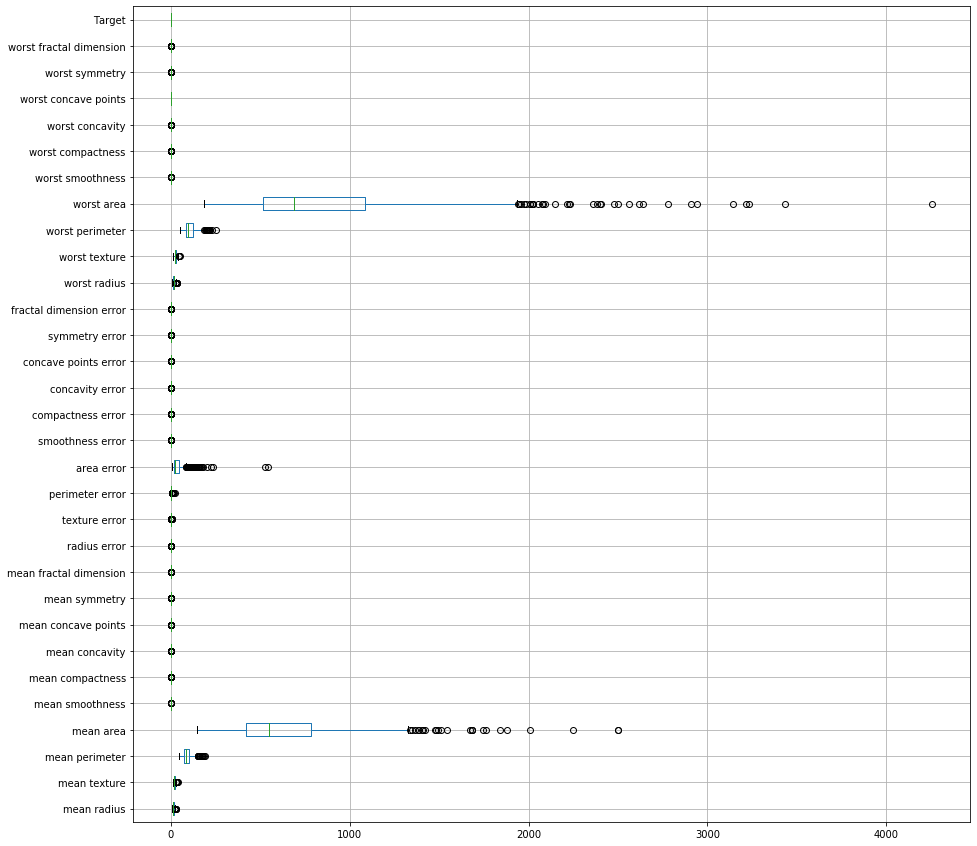

In [6]:
plt.figure(figsize=(15,15))
data.boxplot(vert=0)

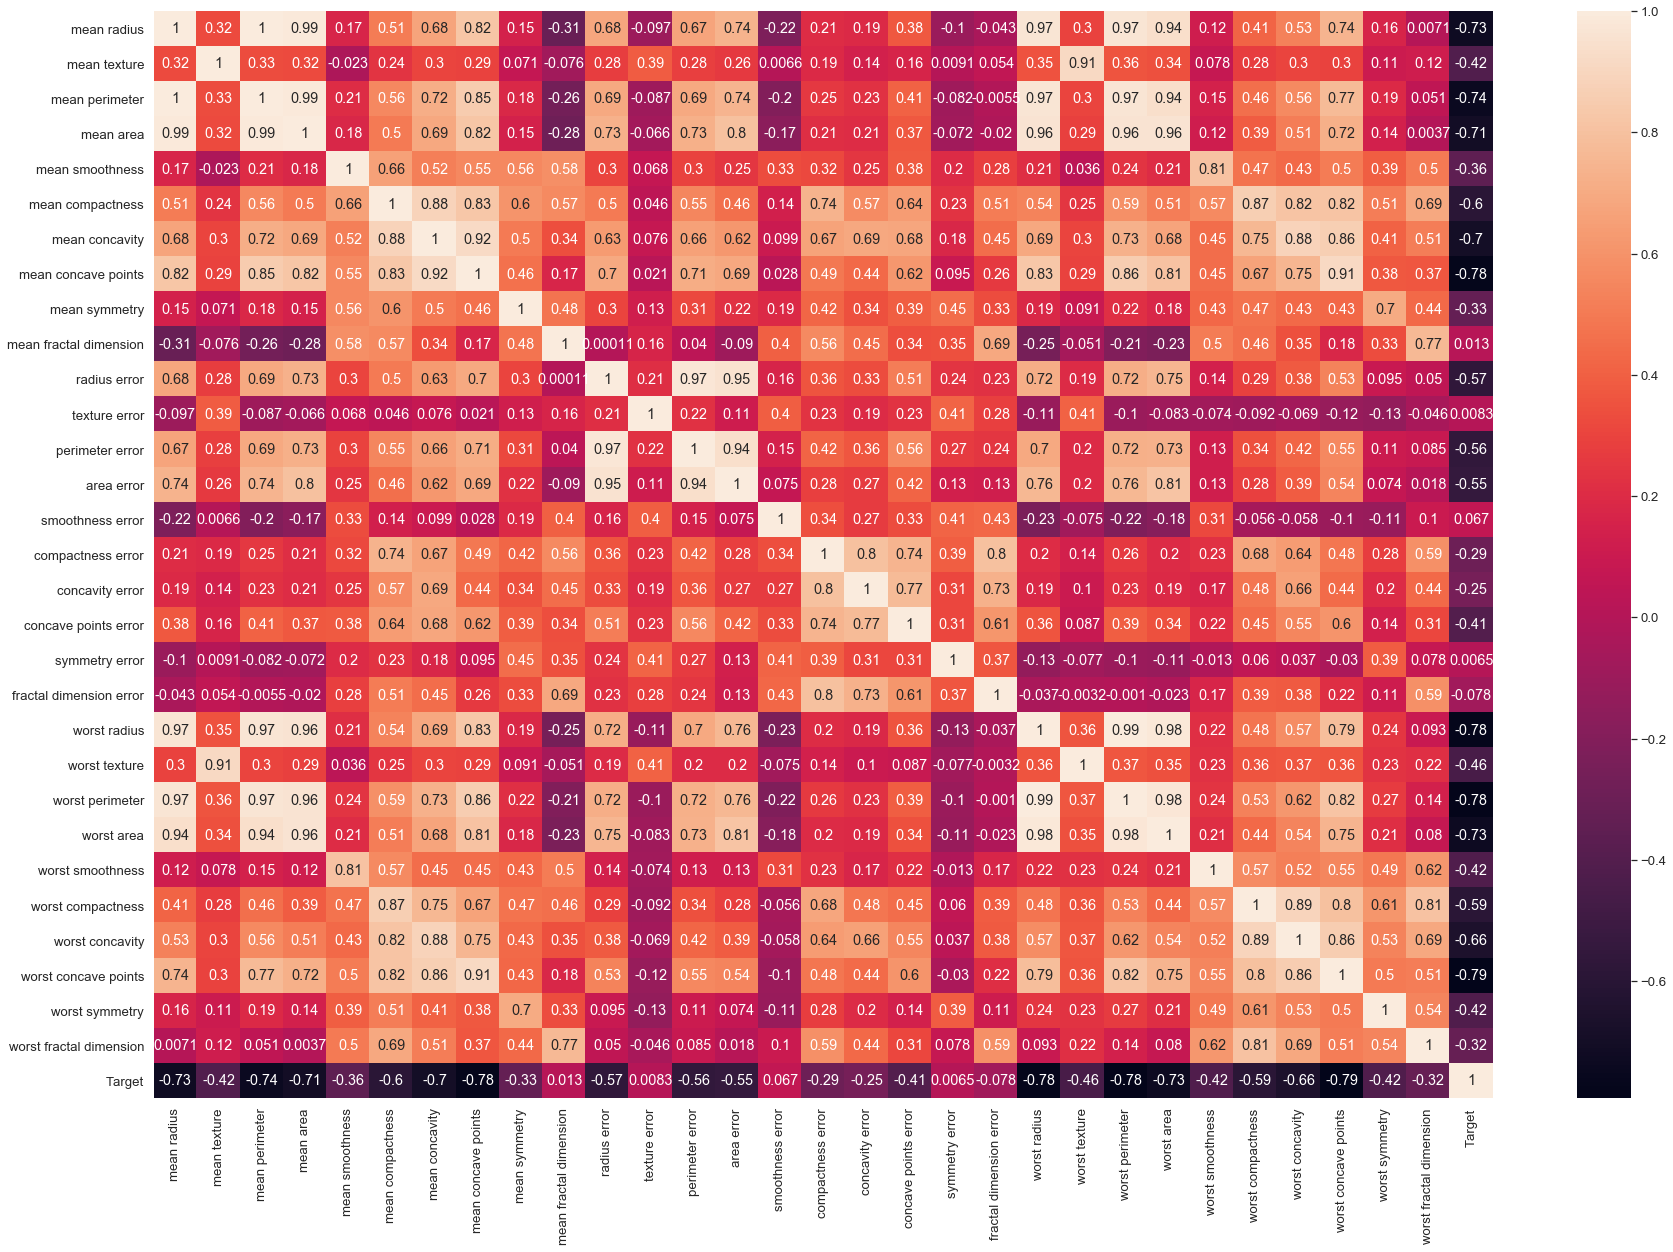

In [7]:
plt.figure(figsize=(30,20))
sns.set(font_scale=1.2)
sns.heatmap(data.corr(), annot=True)

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
y = data['Target']
x = data.drop(['Target'], axis=1)

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.20, random_state=0)

In [11]:
#from sklearn.preprocessing import StandardScaler

In [12]:
#sc = StandardScaler()

In [13]:
#x_train = sc.fit_transform(x_train)

In [14]:
#x_test = sc.transform(x_test)

In [15]:
#clf = MLPClassifier(hidden_layer_sizes=500, max_iter=100,
                     #solver='sgd', verbose=True,  random_state=21,tol=0.0001)

In [16]:
clf = MLPClassifier(hidden_layer_sizes=500,random_state=0)

In [17]:
clf.fit(x_train, y_train)

MLPClassifier(hidden_layer_sizes=500, random_state=0)

#### Predicting training data

In [18]:
y_pred = clf.predict(x_train)

#### Evaluating model performance on training data

In [19]:
from sklearn.metrics import confusion_matrix,classification_report

In [20]:
confusion_matrix(y_train,y_pred)

array([[135,  30],
       [  3, 287]], dtype=int64)

In [21]:
clf.score(x_train,y_train)

0.9274725274725275

In [22]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.82      0.89       165
           1       0.91      0.99      0.95       290

    accuracy                           0.93       455
   macro avg       0.94      0.90      0.92       455
weighted avg       0.93      0.93      0.93       455



AUC: 0.985


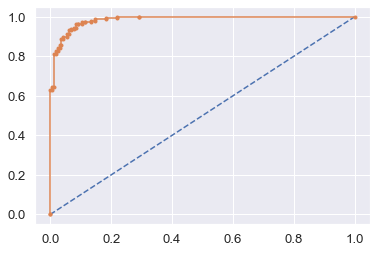

In [23]:
# AUC and ROC for the training data
# predict probabilities
probs = clf.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

#### Predicting Test Data and comparing model performance

In [24]:
y_pred = clf.predict(x_test)

In [25]:
confusion_matrix(y_test, y_pred)

array([[39,  8],
       [ 0, 67]], dtype=int64)

In [26]:
clf.score(x_test,y_test)

0.9298245614035088

In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.83      0.91        47
           1       0.89      1.00      0.94        67

    accuracy                           0.93       114
   macro avg       0.95      0.91      0.93       114
weighted avg       0.94      0.93      0.93       114



AUC: 0.972


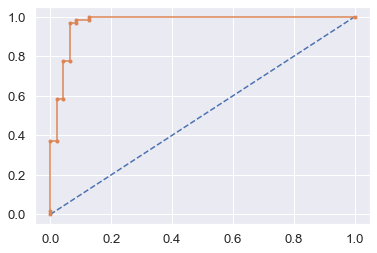

In [28]:
# AUC and ROC for the test data

# predict probabilities
probs = clf.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()